SCT211-0848/2018  
Jany Muong  
ICS 2207: Scientific Computing

# Plotting and Visualization  

## Background Context:  

This project was prepped using  **CHAPTER 4: Plotting and Visualization** - from the book **Numerical Python Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib, Second Edition** by Robert Johansson.  

It is meant to respond to the pset below:  

### Pset:  
In the context of Scientific Computing where plotting and visualization play a crucial role in data analysis and interpretation, how does the integration of various plot types and advanced axes layouts in Python's Matplotlib library enhance the comprehensibility and effectiveness of presenting complex datasets? Discuss the significance of interactive modes in Matplotlib, particularly in the context of exploratory data analysis. Additionally, explain the role of colormap plots and 3D plots in visualizing multidimensional data, highlighting how these visual tools can aid in uncovering underlying patterns and relationships within the data. Provide examples to illustrate how customizing line properties, adding legends, and employing text formatting and annotations contribute to creating informative and visually appealing plots.

In [1]:
# top-level imports
%matplotlib inline
# %config InlineBackend.figure_format='svg'
import matplotlib as mpl
import mpl_toolkits.mplot3d as plt3d
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
from mpl_toolkits.mplot3d import Axes3D

## Pre-Overview: General Plots  
Let's demomnstrate how a plot with ***added descriptive visuals***, and a plot ***without information text***, look like; before we get into the specifics of the project based on the instructions.

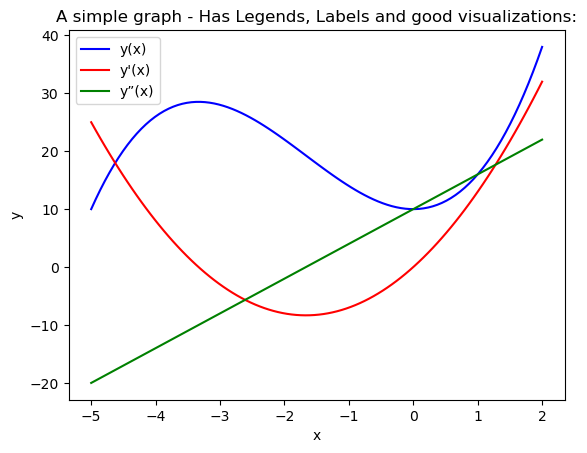

In [2]:
x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10
fig, ax = plt.subplots()
ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y”(x)")
ax.set_title('A simple graph - Has Legends, Labels and good visualizations:')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

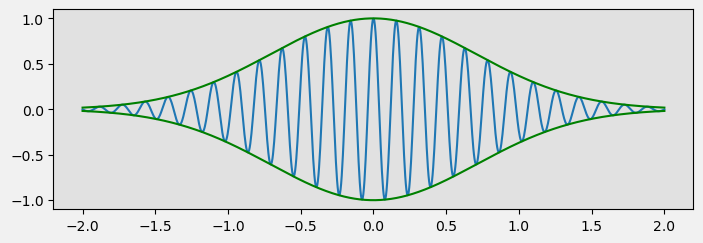

In [3]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")
# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")

x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)
ax.plot(x, y1 * y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')
fig.savefig("graph.png", dpi=100, facecolor="#f1f1f1")

### Pre-Overview - Verdict Of It, and Need for Good Plots/Visualizations:  
From the two graphs above, we can clearly see that the first graph is more visually appealing to the viewer since it sets titles, axes labels and legends etc.  
Lets get into the details of how we can create visually appealing and impressive visualizations as below:

## Segment 1: Integration of Various Plot Types and Advanced Axes Layouts
In scientific and technical visualization, it is common to pack together multiple figures in different panels, for example, in a grid layout - this creates complexity in understanding the layouts and all of it. The integration of various plot types and advanced axes layouts in Matplotlib enhances the comprehensibility of complex datasets. It deals with **Insets**, **GridSpec**, **Subplot** etc.

For examples we can generate sample data and create a figures with subplots using Matplotlib's `subplots()` function and use insets and layout managers, and with customized titles and legends. This integration of different plot types and subplots enhances the presentation and understanding of complex data. Let's look at each of the features to explore ubnder this section: 

### **Insets:**  
Insets are smaller graphs displayed within the region of a larger graph. Matplotlib's `Figure.add_axes` method is used to create insets. Below is a  **Python** snippet for creating a graph with an inset:

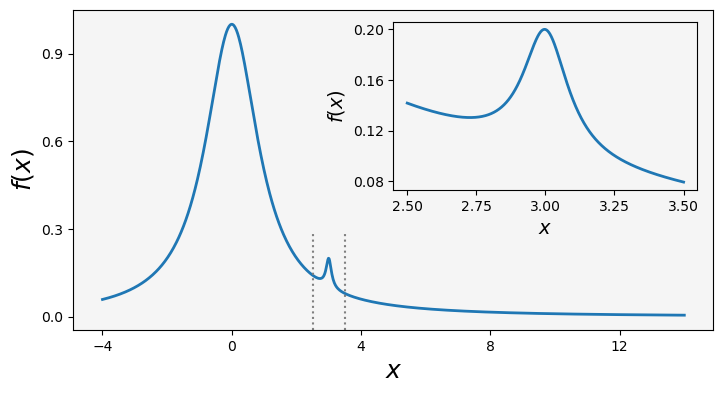

In [4]:
fig = plt.figure(figsize=(8, 4))

def f(x):
   return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)

def plot_and_format_axes(ax, x, f, fontsize):
   ax.plot(x, f(x), linewidth=2)
   ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
   ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
   ax.set_xlabel(r"$x$", fontsize=fontsize)
   ax.set_ylabel(r"$f(x)$", fontsize=fontsize)

# main graph
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#f5f5f5")
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

# inset
x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")

ax_insert = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor='none')
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax_insert, x, f, 14)

### **Subplots:**  
Matplotlib's `plt.subplots` function is used to create grids of subplots, optionally with shared x or y axes. This can be used to discover underlying patterns and correlation. Below is the code snippet for creating a graph with subplots:

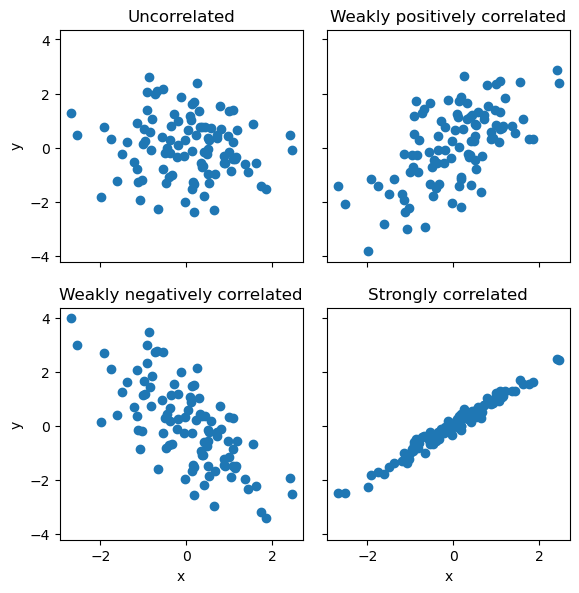

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True, squeeze=False)

x1 = np.random.randn(100)
x2 = np.random.randn(100)

axes[0, 0].set_title("Uncorrelated")
axes[0, 0].scatter(x1, x2)

axes[0, 1].set_title("Weakly positively correlated")
axes[0, 1].scatter(x1, x1 + x2)

axes[1, 0].set_title("Weakly negatively correlated")
axes[1, 0].scatter(x1, -x1 + x2)

axes[1, 1].set_title("Strongly correlated")
axes[1, 1].scatter(x1, x1 + 0.15 * x2)

axes[1, 1].set_xlabel("x")
axes[1, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[1, 0].set_ylabel("y")

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.1, hspace=0.2)
plt.show()

### **GridSpec:**  
`GridSpec` from `mpl.gridspec` is a more general grid layout manager allowing for non-uniform column and row widths. Here's an example of using `GridSpec`:

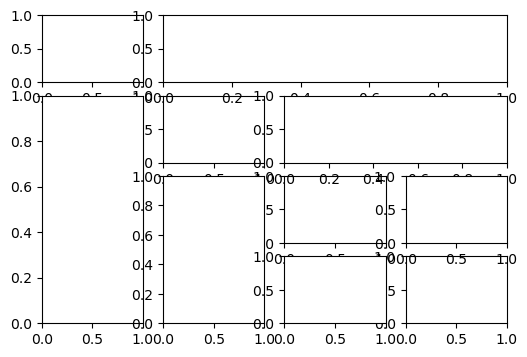

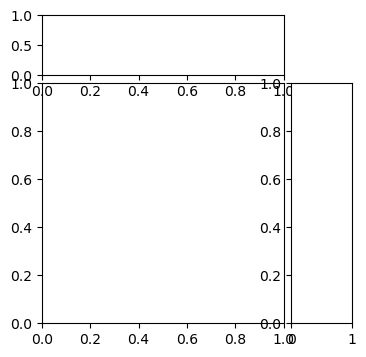

In [6]:
fig = plt.figure(figsize=(6, 4))
gs = mpl.gridspec.GridSpec(4, 4)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[2, 2])
ax3 = fig.add_subplot(gs[3, 3])
ax4 = fig.add_subplot(gs[0, 1:])
ax5 = fig.add_subplot(gs[1:, 0])
ax6 = fig.add_subplot(gs[1, 2:])
ax7 = fig.add_subplot(gs[2:, 1])
ax8 = fig.add_subplot(gs[2, 3])
ax9 = fig.add_subplot(gs[3, 2])
fig = plt.figure(figsize=(4, 4))
gs = mpl.gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.05, hspace=0.05)
ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 1])

### **Subplot2grid:**  
`plt.subplot2grid` is used for creating grid layouts with more flexible placement of Axes instances. Below is an example of using `plt.subplot2grid`:

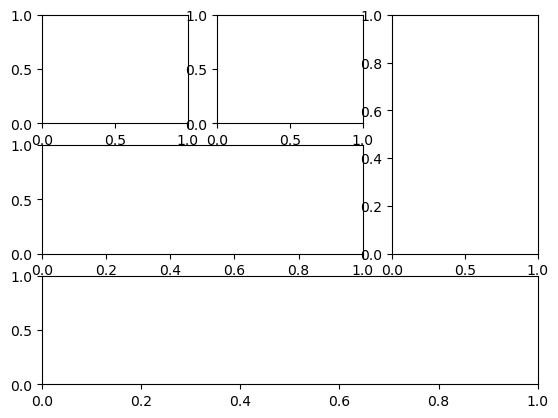

In [7]:
ax0 = plt.subplot2grid((3, 3), (0, 0))
ax1 = plt.subplot2grid((3, 3), (0, 1))
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
ax4 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)

## Segment 2: Significance of Interactive Modes in Matplotlib  

**Matplotlib's interactive modes** play a crucial role in exploratory data analysis (EDA), allowing users to interactively explore data points and gain insights. E.g. we plot a sine wave and enable the interactive cursor using `mplcursors.cursor()`. This allows users to hover over data points and view specific information interactively, improving the exploratory analysis process. Moreover it allows 
to interactively explore figures, for example, by zooming and panning. This example below uses `mplcursors` for interactive data exploration:


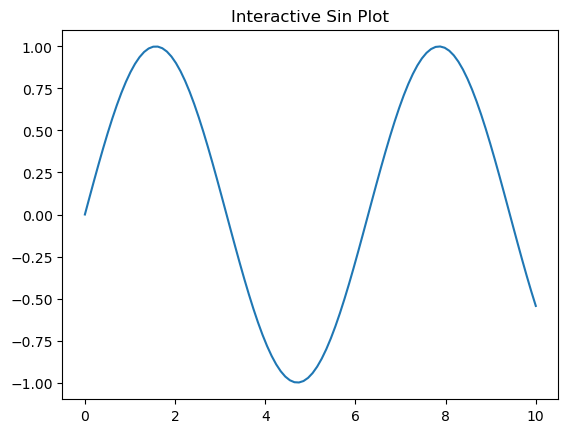

In [8]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
plt.title('Interactive Sin Plot')

# enable interactive cursor
mplcursors.cursor(hover=True)

plt.show()

## Segment 3: Role of Colormap Plots and 3D Plots  

Colormap plots and 3D plots are valuable for visualizing multidimensional data and uncovering underlying patternsUnder this section let's look at a**a colorm** and **3D**ap pls separatelyon:


### Colormap  
**Colormap** plot uses Matplotlib's `imshow()` function:  

We generate random data and create a heatmap colormap plot using the 'viridis' colormap. This type of plot helps visualize *intensity variations* or *correlations* in **multidimensional** data.  



We can reate a colormap plot using Matplotlib's `pcolor` function. It prepares two-dimensional data (X, Y, Z) using NumPy's **meshgrid** and computes the $Z$ values based on a **bivariate function**. The plot is displayed with a color map ($cmap=mpl.cm.bwr$) and a $colorbar$ to indicate the numerical values corresponding to different colors. Axis properties like *labels* and *ticks* are set to enhance the readability of the plot:


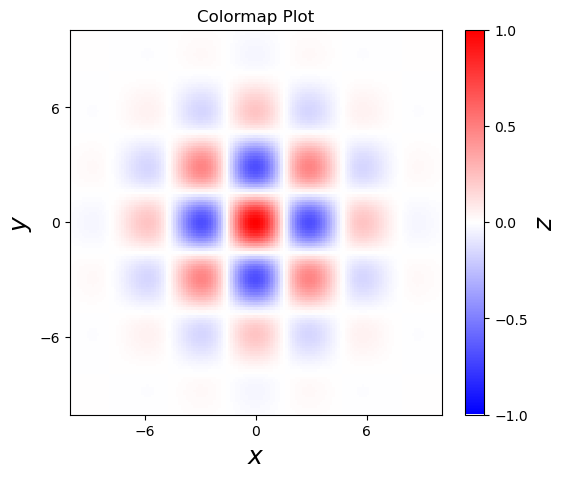

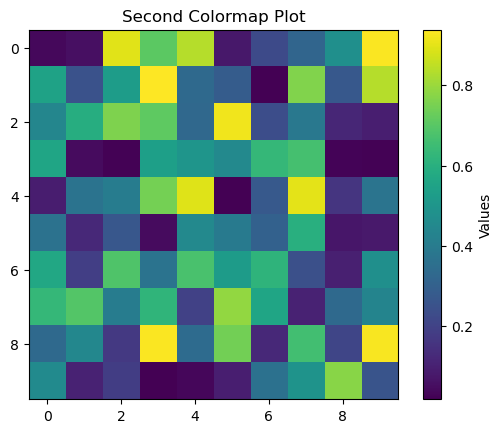

In [9]:
# prepare the data
x = y = np.linspace(-10, 10, 150)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.cos(Y) * np.exp(-(X/5)**2 - (Y/5)**2)

# create a figure and axis
fig, ax = plt.subplots(figsize=(6, 5))

# normalize the data
norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

# plot the colormap graph using pcolor
p = ax.pcolor(X, Y, Z, norm=norm, cmap=mpl.cm.bwr)

# set axis properties
ax.axis('tight')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

# add colorbar
cb = fig.colorbar(p, ax=ax)
cb.set_label(r"$z$", fontsize=18)
cb.set_ticks([-1, -.5, 0, .5, 1])

plt.title('Colormap Plot')
plt.show()

# second colormap
data = np.random.rand(10, 10)

# create a heatmap colormap plot
plt.imshow(data, cmap='viridis')
plt.colorbar(label='Values')
plt.title('Second Colormap Plot')

plt.show()

### 3D Plot  

For 3D plots, we use Matplotlib's `mpl_toolkits.mplot3d` modu and the **Axes3D** object or `add_subplot` function with the 
`projection='3d` argumentle to plot a **3D surface**. This can be used to change the angle/perspective from which the graph is viewed, and 
it takes the elevation and the azimut to create this visual effect that is exciting to the eyes.    
This approach plots a surface based on a mathematical function, showcasing the capability of Matplotlib for visualizing **multidimensional** data in three dimensions.  

In this sub-part for role of 3D plots, we can create a figure with three subplots, each displaying a different type of 3D plot: a surface plot (`plot_surface`), a wireframe plot (`plot_wireframe`), and a contour plot (`contour`). The `title_and_labels` function sets titles and labels for each subplot's axes and labels for each subplot:

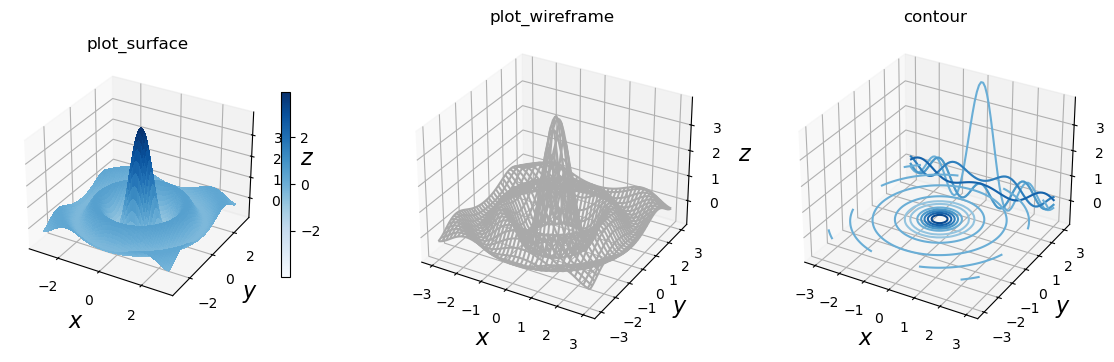

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0, antialiased=False, norm=norm, cmap=plt.cm.Blues)
cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "plot_surface")

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")
title_and_labels(axes[1], "plot_wireframe")

cset = axes[2].contour(X, Y, Z, zdir='z', offset=0, norm=norm, cmap=plt.cm.Blues)
cset = axes[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm, cmap=plt.cm.Blues)
title_and_labels(axes[2], "contour")

plt.show()

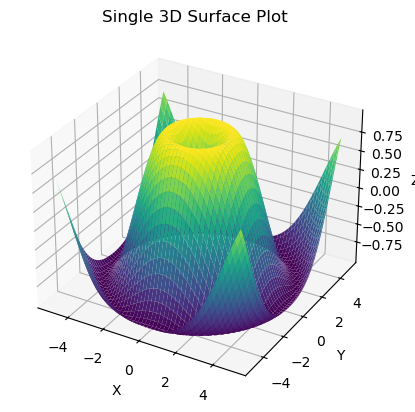

In [11]:
# single 3D example
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

# set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Single 3D Surface Plot')

plt.show()

## Segment 4: Customization and Annotation, and Line Properties in Matplotlib  

In this context we use line plots and line properties and annotations. We frequently need to configure properties of the lines in the graph, 
for example, the **line width**, **line color**, and **line style** (solid, dashed, dotted, etc.). In 
Matplotlib we set these properties with keyword arguments and parameters to the plot methods, such 
as `plot`, `step`, and `bar`. Also, in this context we can format text by embedding **LaTeX** code in strings in Python eg axes labels to achieve a good degree of text formatting. We can also call methods like `mpl.text.Text`, `font.family`, `font.size` to achieve text formatting that is good to look at.  
Customization options and annotations in Matplotlib creates informative and visually appealing plots. Below are demonstration customization and annotatio we plot a sine wave with customized line properties (color, linestyle) and add an annotation to highlight a peak in the plot. These customization options enhance the plot's clarity and visual appeal:

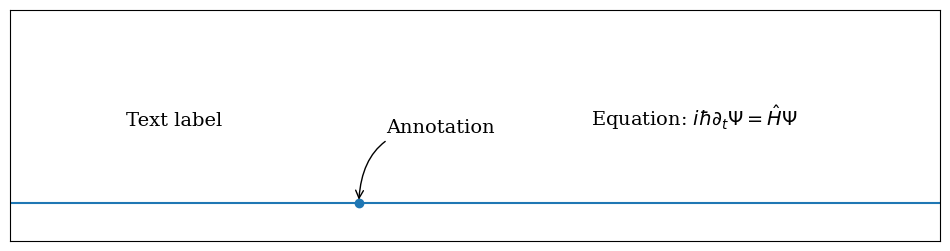

In [12]:
# reate a figure and axis
fig, ax = plt.subplots(figsize=(12, 3))

# Configure axis properties
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0)

# Add a text label
ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

# annotation
ax.plot(1, 0, "o")
ax.annotate("Annotation",
            fontsize=14, family="serif",
            xy=(1, 0), xycoords="data",
            xytext=(+20, +50), textcoords="offset points",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.5"))

# add an equation with LaTeX markup
ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$",
        fontsize=14, family="serif")

# Show the plot
plt.show()


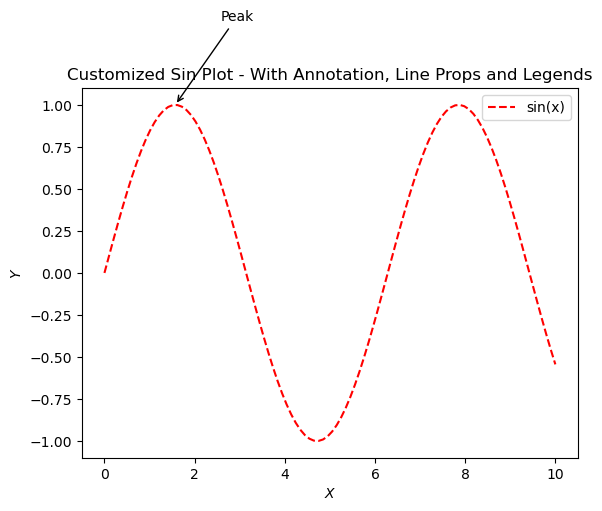

In [13]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

# create a plot with custom line properties and annotations
plt.plot(x, y, label='sin(x)', color='red', linestyle='--')
plt.title('Customized Sin Plot - With Annotation, Line Props and Legends')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.legend()
plt.annotate('Peak', xy=(np.pi/2, 1), xytext=(np.pi/2 + 1, 1.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

# End - File